In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
# see also the "datetime" package
import solutions

# Part 2: Speed Racer!
Let's figure out which of the solutions from last week is the fastest. 

To do this, we want to evaluate the runtime for a varying number of coordinates.

In [2]:
# This tells you the system time in seconds (from some system-dependent zero point)
time.time()

1461717770.618096

**NOTE:** this is *not* the best way to measure time, but it illustrates how the process works. 

Read about the [timeit](https://docs.python.org/2/library/timeit.html) module, and definitely the doccumentation of the [time](https://docs.python.org/3.5/library/time.html) module we're using.

In [3]:
# here's a simple way to determine how long something takes to evaluate:
t0 = time.time()

# do some random task
x = -1
for k in range(0,100000):
    x = k*x

t1 = time.time()

duration = t1 - t0
print('This task took: ' + str(duration) + ' seconds')

This task took: 0.020039081573486328 seconds


In [4]:
# here's how you might return two numbers or arrays from a function

def myfunc(a):
    out1 = a+2
    out2 = a-2
    return out1, out2


In [5]:
x, y = myfunc(7)
print(x,y)

9 5


In [6]:
# an example of random numbers uniformly chosen in the range -5 to 5

# note, other random number distributions exist, and are very useful (e.g. Gaussian!)

N = 20

rmax = 5
rmin = -5

rando_calrissian = np.random.random(N) * (rmax - rmin) + rmin

rando_calrissian

array([-4.25573445,  3.62342988,  2.96658349, -0.75229744, -3.63725065,
        2.13356678,  2.70093156,  0.06470897, -1.44271032,  4.79832615,
       -2.31283167,  0.2211482 , -4.85300602, -3.1954622 , -3.40634871,
        1.26407441, -0.23816   ,  1.7926056 ,  4.8761593 , -1.7208921 ])

Function designed to compare runtimes of two algorithms:

In [15]:
def speedtst(N): 
    
    r1max = 24
    r1min = 0
    r2max = 90
    r2min = -90
    rng1 = np.random.random(N) * (r1max - r1min) + r1min
    rng2 = np.random.random(N) * (r2max - r2min) + r2min 
    
    
    
    td0 = time.time()
    x = solutions.constell_davenport(rng1,rng2)
    td1= time.time()
    
    th0 = time.time()
    for i in range(N):
        y = solutions.constell_christenson(rng1[i],rng2[i])
    th1 = time.time()
    
    dur_davenport = td1-td0
    dur_holly = th1-th0
    
    return dur_davenport, dur_holly

In [26]:
speedtst(50)

(0.011106014251708984, 0.3572728633880615)

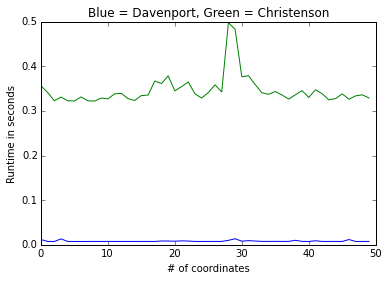

In [29]:
c_array1 = np.zeros(50)
c_array2 = np.zeros(50)

for p in range (50):
    co1, co2 = speedtst(50)
    c_array1[p] = co1
    c_array2[p] = co2
    

m = np.arange(0,50,1)
plt.plot(m,c_array1)
plt.plot(m,c_array2)
plt.title('Blue = Davenport, Green = Christenson')
plt.xlabel('# of coordinates')
plt.ylabel('Runtime in seconds')

Let's see how the Davenport algorithm's runtimes hold up for a very large number of coordinates:

WARNING: NEXT CELL HAS VERY LONG RUNTIME

In [9]:
t=100000
Nsteps = 20
t_steps = np.floor(np.linspace(1,t,Nsteps))
out1 = np.zeros(len(t_steps))
out2 = np.zeros(len(t_steps))

print(len(t_steps))

for j in range (0,len(t_steps)):
    print(j)
    n1,n2 = speedtst(t_steps[j])
    out1[j] = n1
    out2[j] = n2

print(out1)

20
0
1


/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/Riley/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
[  1.42087936e-02   4.92490053e-01   2.32961297e+00   6.49537802e+00
   1.15545299e+01   1.93357959e+01   3.17578311e+01   4.15796239e+01
   5.73912351e+01   7.22537601e+01   9.17893112e+01   1.11856741e+02
   1.35538547e+02   1.61117672e+02   1.83780072e+02   2.07697340e+02
   2.42421276e+02   2.68862468e+02   3.26625711e+02   3.36959792e+02]


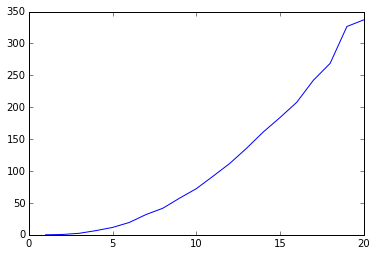

In [14]:
n = np.arange(1,21,1)
plt.plot(n,out1)
#plt.plot(n,out2)
#plt.yscale('log')

Plot above shows interesting exponential runtime growth when calculating large numbers of coordinates.

# Part 3: Write some unit tests

**unittest**: There *is* a [built-in framework](https://docs.python.org/2.7/library/unittest.html) for formally handling unit tests. It is a little difficult to start using, and we won't use it today. There are some nicer testing suites available (e.g. [nose](https://nose.readthedocs.org/en/latest/))

**Exceptions**: Python defines a bunch of [built-in exceptions](https://docs.python.org/2/library/exceptions.html) that can come up when code crashes. In general you'll try to [catch these](https://wiki.python.org/moin/HandlingExceptions) and handle them gracefully. Usually I write Try/Except statements as I find these errors


In [ ]:
def number_test(input):
    '''
    An example of using a Try/Except statement to catch an error.
    You could imagine doing something more useful than just printing stuff to the screen...
    '''
    try:
        val = float(input)
        print('Yup...')
    except ValueError:
        print("Not a float!")

In [ ]:
a = 'hamburger'
b = 123.45

number_test(b)